---
## Webserver
---

Bekijk het bijgeleverde bestand: "UofS_access_log".  Hierin staat een log van een webserver.  Iedere lijn bevat informatie over een request dat naar de server werd gestuurd.  Je vindt per request volgende informatie terug:

- de naam of ip-adres van de client
- het tijdstip
- de HTTP request die gebeurde
- de HTTP response code
- het aantal bytes in de response

---

- Lees het bestand in Python.

  - Zorg ervoor dat je slechts 5 kolommen overhoudt met de namen: "client", "date", "request", "response_code", "response_length".  
  - Vervang '-' in de response.length door 0

Gebruik 3 beduidende cijfers in je antwoorden.



In [328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [329]:
data = pd.read_csv("data/UofS_access_log.small", sep=" ", encoding="latin", header=None, on_bad_lines='skip')

In [330]:
client = data.iloc[:,0]
date = data.iloc[:,3] + data.iloc[:,4]
request = data.iloc[:,5]
response_code = data.iloc[:,6]
response_length = data.iloc[:,7]
log = pd.DataFrame({
    "client":client,
    "date":date,
    "request":request,
    "response_code":response_code,
    "response_length":response_length
})

log['response_length'] = log['response_length'].replace('-', 0).astype(int)

display(log) # Test

,client,date,request,response_code,response_length
0,cad49.cadvision.com,[01/Jun/1995:00:53:19-0600],GET /~lowey/webville/icons/blank_32.gif,200,167
1,130.89.250.24,[01/Jun/1995:02:45:12-0600],GET /~lowey/webville/icons/south_32.gif,200,210
2,130.54.25.198,[01/Jun/1995:03:29:56-0600],GET /~macphed/finite/fe_resources/node92.html,200,1668
3,148.81.17.41,[01/Jun/1995:04:02:17-0600],GET /~friesend/tolkien/rootpage.html,200,461
4,anumsun6.univ-st-etienne.fr,[01/Jun/1995:04:40:30-0600],GET /~macphed/finite/fe_resources/node58.html,200,1707
...,...,...,...,...,...
48166,duke.usask.ca,[31/Dec/1995:23:07:50-0600],GET /images/comments_50.gif HTTP/1.0,200,388
48167,sask.usask.ca,[31/Dec/1995:23:16:16-0600],GET / HTTP/1.0,200,3856
48168,144.92.13.6,[31/Dec/1995:23:25:53-0600],GET /~ladd/virginia_pisu.html,200,915
48169,ccc055.canuck.com,[31/Dec/1995:23:32:35-0600],GET /mlookup/white.html HTTP/1.0,200,728


### Oefening 1
Welke response code komt het meest voor?  Aan de hand van welke frequenties kan je dit zien?


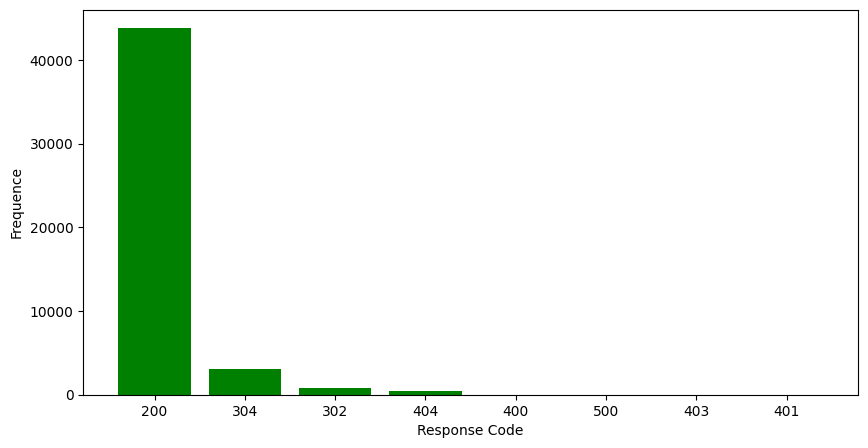

In [331]:
frequence = log.response_code.value_counts()

code = ["200","304","302","404","400","500","403","401"]


fig, ax = plt.subplots(figsize=(10, 5))
_ = ax.bar(x=code, height=frequence, color='green')
_ = ax.set_xlabel('Response Code')
_ = ax.set_ylabel('Frequence')

### Oefening 2
Hoeveel procent van de requests bevat een response code die groter is dan 200?


In [332]:
frequence = log.response_code.value_counts()

code = [200,304,302,404,400,500,403,401]

df = pd.DataFrame({'code':code,'frequence':frequence})

cum_frequentie = df[df['code']<=200]['frequence'].sum()

totaal_frequentie = df['frequence'].sum()
cum_percentage = cum_frequentie/totaal_frequentie*100

print(f"Cumulatief percentage bij code 200: {cum_percentage:.2f}%")

Cumulatief percentage bij code 200: 90.96%


### Oefening 3  

Hoeveel keer komt een response code 401 voor?


In [333]:
frequence = log.response_code.value_counts()

code = [200,304,302,404,400,500,403,401]

df = pd.DataFrame({'code':code,'frequence':frequence})

x = df[df['code']==401]['frequence'].sum()


print(f"Hoe vaak komt cod 401 voor: {x:d}")

Hoe vaak komt cod 401 voor: 3


### Oefening 4  

Welke documenten werden opgevraagd bij een response code 401?


In [334]:
x = 0
for i in log.response_code:
    if i == 401:
        print(log.request.iloc[x])
    x += 1

GET /dcs/pts/variables.html?KEVIN_TEST=HELLO HTTP/1.0
GET /dcs/pts/ HTTP/1.0
GET /dcs/pts/cgi-bin/record.html HTTP/1.0


### Oefening 5  

Welke clients probeerden ongeautoriseerd een document te raadplegen?


In [335]:
x = 0
for i in log.response_code:
    if i == 401:
        print(log.client.iloc[x])
    x += 1

duke.usask.ca
manitou1_5.usask.ca
cwis.usask.ca


### Oefening 6  

Welke client probeerde het meest een ongeautoriseerd een document te raadplegen?


In [336]:
x = 0
client = []
for i in log.response_code:
    if i == 401:
        client = client + [log.client.iloc[x]]

    x += 1

unique, counts = np.unique(client, return_counts=True)
most_common = unique[np.argmax(counts)]

print(most_common)

cwis.usask.ca


### Oefening 7

Maak een taartdiagram van de response codes die niet gelijk zijn aan 200.


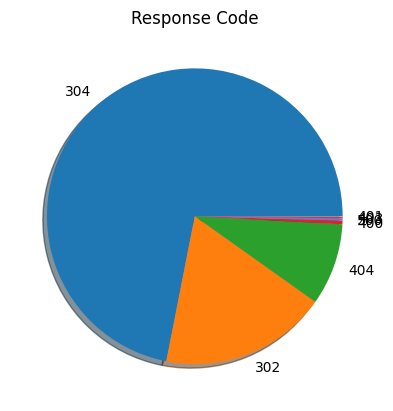

In [337]:
frequence = log.response_code.value_counts()

# code = [200,304,302,404,400,500,403,401]

# df = pd.DataFrame({'code':code,'frequence':frequence})
#
# codeA = df[df['code']==304]['frequence'].sum()
# codeB = df[df['code']==302]['frequence'].sum()
# codeC = df[df['code']==404]['frequence'].sum()
# codeD = df[df['code']==400]['frequence'].sum()
# codeE = df[df['code']==500]['frequence'].sum()
# codeF = df[df['code']==403]['frequence'].sum()
# codeG = df[df['code']==401]['frequence'].sum()
#
# data = pd.Series([codeA,codeB,codeC,codeD,codeE,codeF,codeG])

frequence = frequence.drop(200)

label = [304,302,404,400,500,403,401]

fig, ax = plt.subplots()
_ = ax.pie(frequence, labels=label, shadow=True)
_ = ax.set_title('Response Code')

### Oefening 8  

Maak een staafdiagram van dezelfde response codes.  Merk het verschil op in leesbaarheid tussen deze en de vorige afbeelding


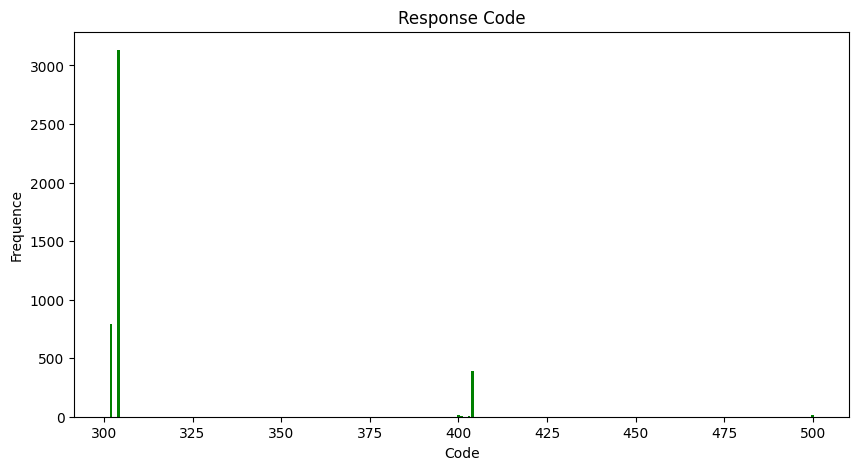

In [338]:
frequence = log.response_code.value_counts()
frequence = frequence.drop(200)

label = [304,302,404,400,500,403,401]

fig, ax = plt.subplots(figsize=(10, 5))

_ = ax.bar(x=label, height=frequence, color='green')
_ = ax.set_title('Response Code')
_ = ax.set_xlabel('Code')
_ = ax.set_ylabel('Frequence')

### Oefening 9  

Welke response code komt hier het meest voor?  Wat betekent deze response code?


In [339]:
# The HTTP 304 Not Modified client redirection response code indicates that there is no need to retransmit the requested resources. It is an implicit redirection to a cached resource. This happens when the request method is a safe method, such as GET or HEAD, or when the request is conditional and uses an If-None-Match or an If-Modified-Since header.

### Oefening 10  

Hoe groot is de langste response die gestuurd werd?  Welk bestand werd hier doorgestuurd?


In [340]:
# (1)
print(max(log.response_length))

# (2)
x = 0
for i in log.response_length:
    if max(log.response_length) == i:
        print(log.request.iloc[x])
    x += 1


2790949
GET /~reevesm/sounds/sultans.au


### Oefening 11  

Selecteer alle regels waarbij response_length kleiner is dan 30 000 bytes.  Maak klassen van de response_length met klassenbreedte gelijk aan 1000 bytes, waarbij de linker-grens steeds bij de klasse hoort.  Hoeveel responses hebben een lengte kleiner dan 1000 bytes?


In [341]:
length = log.response_length

cutpoints = range(0,30001,1000)

klassen = pd.cut(length, bins=cutpoints, include_lowest=True)

data = klassen.value_counts().sort_index()

print(data) # TEST

# Bepaal aantal responses met lengte kleiner dan 1000 bytes
n_responses_lt_1000 = len(log[log['response_length'] < 1000])



# Print aantal responses met lengte kleiner dan 1000 bytes
print(f"Het aantal responses met een lengte kleiner dan 1000 bytes is: {n_responses_lt_1000}")

(-0.001, 1000.0]      15535
(1000.0, 2000.0]      11379
(2000.0, 3000.0]       5682
(3000.0, 4000.0]       4603
(4000.0, 5000.0]       1809
(5000.0, 6000.0]       1493
(6000.0, 7000.0]       1575
(7000.0, 8000.0]        644
(8000.0, 9000.0]        304
(9000.0, 10000.0]       143
(10000.0, 11000.0]      197
(11000.0, 12000.0]      141
(12000.0, 13000.0]      247
(13000.0, 14000.0]       99
(14000.0, 15000.0]      162
(15000.0, 16000.0]       52
(16000.0, 17000.0]      145
(17000.0, 18000.0]       66
(18000.0, 19000.0]       59
(19000.0, 20000.0]       89
(20000.0, 21000.0]       51
(21000.0, 22000.0]       59
(22000.0, 23000.0]      929
(23000.0, 24000.0]      389
(24000.0, 25000.0]      133
(25000.0, 26000.0]      177
(26000.0, 27000.0]       36
(27000.0, 28000.0]      185
(28000.0, 29000.0]       87
(29000.0, 30000.0]       53
Name: response_length, dtype: int64
Het aantal responses met een lengte kleiner dan 1000 bytes is: 15534


### Oefening 12  

Hoeveel procent van de responses zijn tussen de 1000 en 2000 bytes groot?


In [342]:
length = log.response_length

cutpoints = range(0,30001,1000)

klassen = pd.cut(length, bins=cutpoints, include_lowest=True)

frequentie = klassen.value_counts().sort_index()

klassen = range(0, 30000, 1000)

df = pd.DataFrame({'klassen':klassen,'frequentie':frequentie})

cum_frequentie = df[df['klassen'].between(1000, 2000)]['frequentie'].sum()

totaal_frequentie = df['frequentie'].sum()
cum_percentage = cum_frequentie/totaal_frequentie*100

print(f"Cumulatief percentage bij 1000 en 2000 bytes: {cum_percentage:.2f}%")

Cumulatief percentage bij 1000 en 2000 bytes: 36.67%


### Oefening 13  

Hoeveel procent van de responses zijn kleiner dan 6000 bytes?


In [343]:
length = log.response_length

cutpoints = range(0,30001,1000)

klassen = pd.cut(length, bins=cutpoints, include_lowest=True)

frequentie = klassen.value_counts().sort_index()

klassen = range(0, 30000, 1000)

df = pd.DataFrame({'klassen':klassen,'frequentie':frequentie})

cum_frequentie = df[df['klassen']<6000]['frequentie'].sum()

totaal_frequentie = df['frequentie'].sum()
cum_percentage = cum_frequentie/totaal_frequentie*100

print(f"Cumulatief percentage kleiner dan 6000 bytes: {cum_percentage:.2f}%")

Cumulatief percentage kleiner dan 6000 bytes: 87.06%


### Oefening 14  

Is een response van 5000-6000 bytes groot of klein?


In [344]:
length = log.response_length

cutpoints = range(0,30001,1000)

klassen = pd.cut(length, bins=cutpoints, include_lowest=True)

frequentie = klassen.value_counts().sort_index()

klassen = range(0, 30000, 1000)

df = pd.DataFrame({'klassen':klassen,'frequentie':frequentie})

cum_frequentie = df[df['klassen'].between(5000, 6000)]['frequentie'].sum()

totaal_frequentie = df['frequentie'].sum()
cum_percentage = cum_frequentie/totaal_frequentie*100

# Als minder Als de helft deze capaciteit heeft, wordt het gezien als groot. (Klopt niet helemaal omdat ik .between(5000, 6000) gebruik kan ook met >=<)
if cum_percentage < 50:
    print(f"Cumulatief percentage bij 5000 en 6000 bytes -> {cum_percentage:.2f}% dus groter")
else:
    print(f"Cumulatief percentage bij 5000 en 6000 bytes -> {cum_percentage:.2f}% dus klein")

Cumulatief percentage bij 5000 en 6000 bytes -> 6.59% dus groter


### Oefening 15  

Teken een barplot (Staafdiagram) van de absolute frequenties


In [345]:
length = log.response_length

cutpoints = range(0,30001,1000)

klassen = pd.cut(length, bins=cutpoints, include_lowest=True)

frequentie = klassen.value_counts().sort_index()

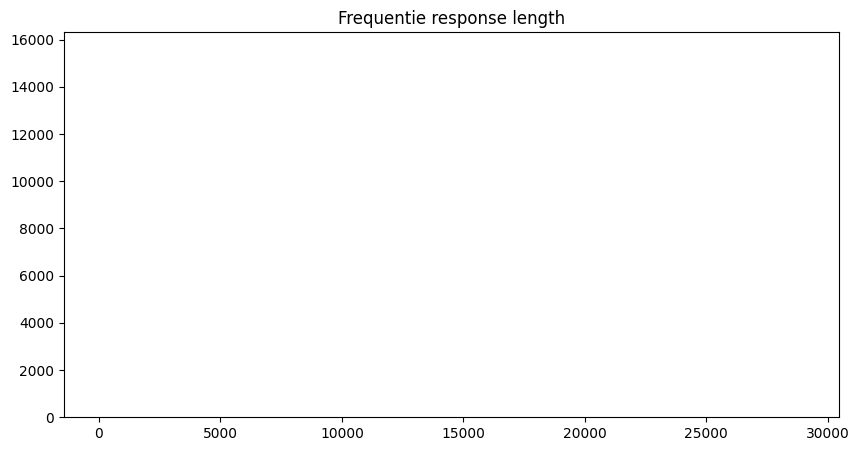

In [346]:
l = range(0, 30000, 1000)

fig, ax = plt.subplots(figsize=(10, 5))
_ = ax.bar(x=l, height=frequentie, color='green')
_ = ax.set_title('Frequentie response length')

print()